In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/transactions.csv")
df.head()

,transaction_id,customer_id,amount,transaction_type,country,hour,is_fraud
0,TX_000000,CUST_0052,0.94,wire,PL,14,0
1,TX_000001,CUST_0093,98.23,card,DE,15,0
2,TX_000002,CUST_0015,14.75,card,NG,1,0
3,TX_000003,CUST_0072,91.29,card,PL,17,0
4,TX_000004,CUST_0061,100.03,wire,PL,11,0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    3000 non-null   object 
 1   customer_id       3000 non-null   object 
 2   amount            3000 non-null   float64
 3   transaction_type  3000 non-null   object 
 4   country           3000 non-null   object 
 5   hour              3000 non-null   int64  
 6   is_fraud          3000 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 164.2+ KB


In [3]:
df["is_fraud"].value_counts()

is_fraud
0    2950
1      50
Name: count, dtype: int64

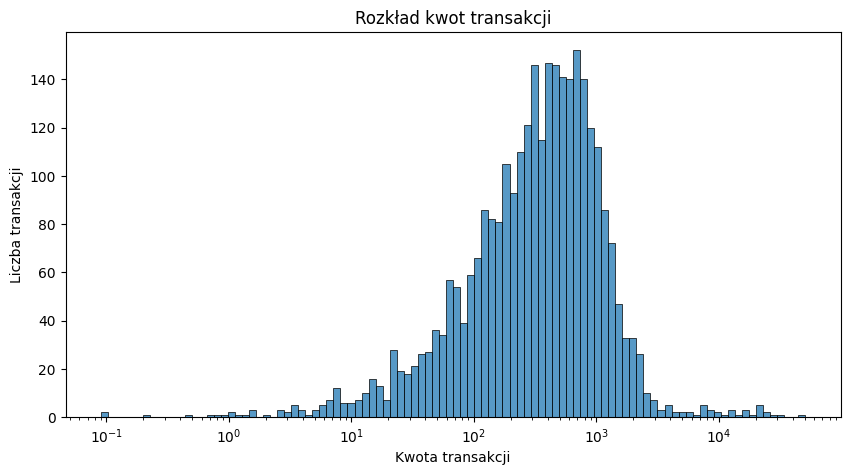

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["amount"], bins=100, log_scale=True)
plt.title("Rozkład kwot transakcji")
plt.xlabel("Kwota transakcji")
plt.ylabel("Liczba transakcji")
plt.show()

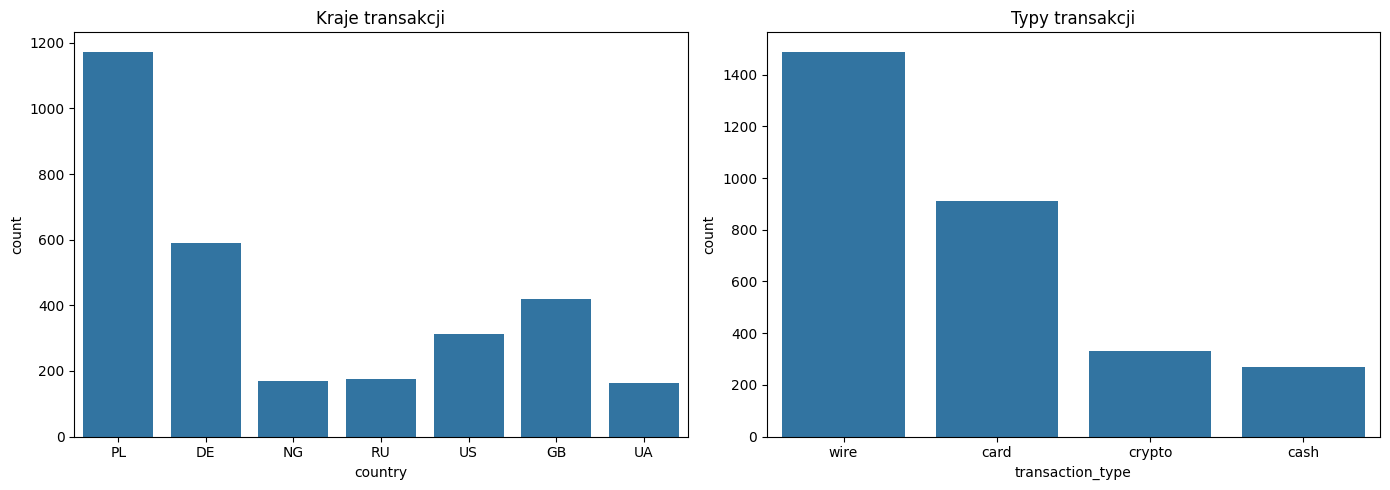

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x="country", data=df, ax=ax[0])
ax[0].set_title("Kraje transakcji")

sns.countplot(x="transaction_type", data=df, ax=ax[1])
ax[1].set_title("Typy transakcji")

plt.tight_layout()
plt.show()

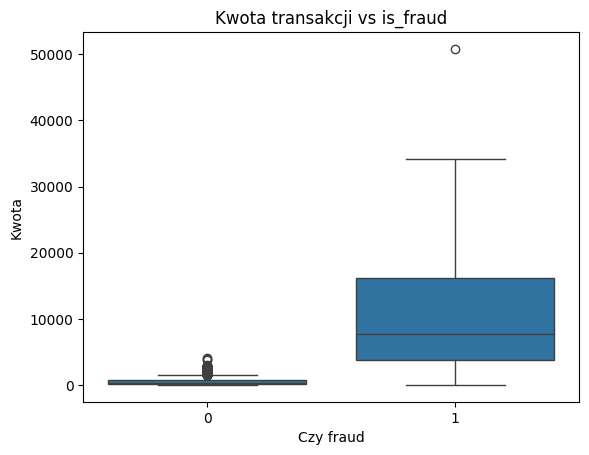

In [7]:
sns.boxplot(data=df, x="is_fraud", y="amount")
plt.title("Kwota transakcji vs is_fraud")
plt.xlabel("Czy fraud")
plt.ylabel("Kwota")
plt.show()


In [8]:
features = ["amount", "transaction_type", "country", "hour"]
target = "is_fraud"

df_model = df[features + [target]].copy()
df_model.head()

,amount,transaction_type,country,hour,is_fraud
0,0.94,wire,PL,14,0
1,98.23,card,DE,15,0
2,14.75,card,NG,1,0
3,91.29,card,PL,17,0
4,100.03,wire,PL,11,0


In [9]:
df_encoded = pd.get_dummies(df_model, columns=["transaction_type", "country"], drop_first=True)
df_encoded.head()

,amount,hour,is_fraud,transaction_type_cash,transaction_type_crypto,transaction_type_wire,country_GB,country_NG,country_PL,country_RU,country_UA,country_US
0,0.94,14,0,False,False,True,False,False,True,False,False,False
1,98.23,15,0,False,False,False,False,False,False,False,False,False
2,14.75,1,0,False,False,False,False,True,False,False,False,False
3,91.29,17,0,False,False,False,False,False,True,False,False,False
4,100.03,11,0,False,False,True,False,False,True,False,False,False


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[["amount", "hour"]] = scaler.fit_transform(df_encoded[["amount", "hour"]])
df_encoded.head()

,amount,hour,is_fraud,transaction_type_cash,transaction_type_crypto,transaction_type_wire,country_GB,country_NG,country_PL,country_RU,country_UA,country_US
0,-0.349732,0.329656,0,False,False,True,False,False,True,False,False,False
1,-0.298933,0.472633,0,False,False,False,False,False,False,False,False,False
2,-0.342522,-1.529038,0,False,False,False,False,True,False,False,False,False
3,-0.302557,0.758586,0,False,False,False,False,False,True,False,False,False
4,-0.297993,-0.099273,0,False,False,True,False,False,True,False,False,False


In [11]:
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [12]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3000, 11)
y shape: (3000,)


In [13]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)

model.fit(X)

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [14]:
y_pred = model.predict(X)
y_pred = [1 if val == -1 else 0 for val in y_pred]

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print("Macierz pomyłek:")
print(confusion_matrix(y, y_pred))

print("\nRaport klasyfikacji:")
print(classification_report(y, y_pred, digits=4))

Macierz pomyłek:
[[2922   28]
 [  18   32]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0     0.9939    0.9905    0.9922      2950
           1     0.5333    0.6400    0.5818        50

    accuracy                         0.9847      3000
   macro avg     0.7636    0.8153    0.7870      3000
weighted avg     0.9862    0.9847    0.9854      3000



In [5]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
# ------------------- IMPORTY -------------------
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# ------------------- WCZYTANIE DANYCH -------------------
# Plik z Twoimi oznaczeniami – upewnij się, że istnieje!
flags = pd.read_csv("data/flags.csv")

# ------------------- PRZYGOTOWANIE DANYCH -------------------
X = flags[["amount", "transaction_type", "country", "hour"]]
y = flags["user_flag"].map({"ok": 0, "fraud": 1})  # etykiety binarne

# One-hot encoding dla kolumn tekstowych
X = pd.get_dummies(X, columns=["transaction_type", "country"], drop_first=True)

# Skalowanie kolumn numerycznych
scaler = StandardScaler()
X[["amount", "hour"]] = scaler.fit_transform(X[["amount", "hour"]])

# ------------------- TRENING MODELU -------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# ------------------- ZAPIS MODELU I SKALERA -------------------
joblib.dump(clf, "models/random_forest.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print("✅ Model i scaler zapisane!")


FileNotFoundError: [Errno 2] No such file or directory: 'data/flags.csv'